In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_8_PCA

21-07-2022  13:15    <DIR>          .
21-07-2022  13:15    <DIR>          ..
20-07-2022  21:57    <DIR>          .ipynb_checkpoints
21-07-2022  13:15            92,106 assignment8_PCA.ipynb
02-07-2022  09:19               368 PCA_problem Statement.txt


# Problem statement

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data.

(class column we have ignored at the begining who shows it has 3 clusters)

In [94]:
df=pd.read_csv('wine.csv')

02-07-2022  09:19            11,425 wine.csv
               3 File(s)        103,899 bytes
               3 Dir(s)  116,865,142,784 bytes free


In [95]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [96]:
df.shape

(178, 14)

In [97]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

Text(0, 0.5, 'Value Count')

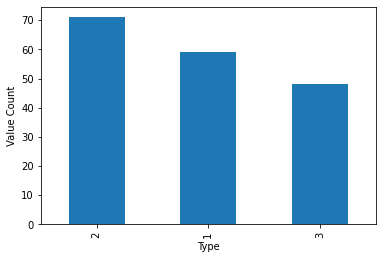

In [98]:
df.Type.value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Value Count')

In [99]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [100]:
def get_norm(i):
    i=(i-i.min())/(i.max()-i.min())
    return i

In [101]:
# Scaling the features
df_norm=get_norm(df.iloc[:,1:])

In [102]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [103]:
pca=PCA()
pca_values=pca.fit_transform(df_norm.iloc[:,:])

In [104]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

Text(0, 0.5, 'Importaance of features')

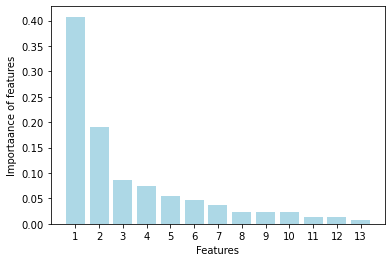

In [105]:
var=pca.explained_variance_ratio_
plt.bar(np.arange(1,14,1),var,color='lightblue')
plt.xticks(np.arange(1,14,1))
plt.xlabel('Features')
plt.ylabel('Importaance of features')

In [106]:
# Taking only first three features into consideration

data=pd.DataFrame(columns=['pc1','pc2','pc3','Type'])

In [107]:
data['pc1']=pca_values[:,0]
data['pc2']=pca_values[:,1]
data['pc3']=pca_values[:,2]
data['Type']=df['Type']

In [108]:
data

,pc1,pc2,pc3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


# Hierarchical Clustering

In [109]:
data

,pc1,pc2,pc3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


In [110]:
# Silhouette Score Mehod

k_range=range(2,10)
sc_score=[]
for k in k_range:
    hc_model=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='single')
    y_hc=hc_model.fit_predict(data.iloc[:,:-1])
    sc_score.append(silhouette_score(data.iloc[:,:-1],y_hc))

In [111]:
sc_score

[0.26571303050122874,
 0.14206633532594234,
 -0.0003980408335668756,
 -0.20068264595658203,
 -0.21939509430354773,
 -0.30508456260812117,
 -0.30306798786317507,
 -0.31227801290198093]

Text(0, 0.5, 'Silhouette Score')

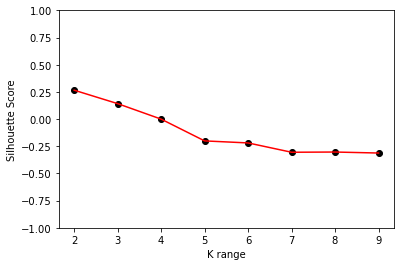

In [112]:
# Plotting for better understanding

plt.plot(k_range,sc_score,color='red')
plt.scatter(k_range,sc_score,color='black')
plt.xticks(k_range);
plt.ylim(-1,1)
plt.xlabel('K range')
plt.ylabel('Silhouette Score')

For Hierarchical Clustering the Optimal number of Clusters obtained using Silhouette Score Method is "2"

# K Means

In [113]:
data

,pc1,pc2,pc3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


In [114]:
# Elbow Method

K_range=range(2,10)
inertia=[]
for k in K_range:
    km_model=KMeans(n_clusters=k)
    y_km=km_model.fit_predict(data.iloc[:,:-1])
    inertia.append(km_model.inertia_)

Text(0.5, 0, 'K range')

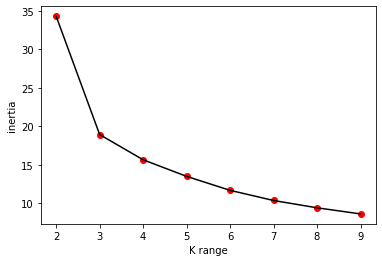

In [115]:
# Plotting for better understanding

plt.plot(K_range,inertia,color='black')
plt.scatter(K_range,inertia,color='red')
plt.xticks(K_range)
plt.ylabel('inertia')
plt.xlabel('K range')

From the Elbow method the Optimal Number of Clusters for K-Means Clustering Method is "3".

In [116]:
# Silhouette Score

K_range=range(2,10)
Score=[]
for k in k_range:
    km_model=KMeans(n_clusters=k)
    y_km=km_model.fit_predict(data.iloc[:,:-1])
    Score.append(silhouette_score(data.iloc[:,:-1],y_km))

In [117]:
Score

[0.4323518936290525,
 0.47796626568347655,
 0.4157533202515142,
 0.3609269352102054,
 0.36498900591442457,
 0.2966505094091627,
 0.2687965452468606,
 0.30135549729638406]

Text(0, 0.5, 'Silhouette Score')

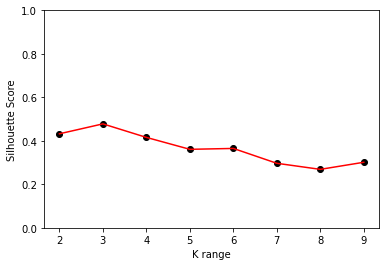

In [118]:
# Plotting for better understanding

plt.plot(K_range,Score,color='red')
plt.scatter(K_range,Score,color='black')
plt.xticks(K_range);
plt.ylim(0,1)
plt.xlabel('K range')
plt.ylabel('Silhouette Score')

From the Silhouette Score method the Optimal Number of Clusters for K-Means Clustering Method is "3".

# Conclusion

- The Original data is having number of clusters= 3

- After performing PCA, and taking into consideration the first three principle components we created another data 

- From Hierarchical Clustering we are getting Optimal number of Clusters= 2

- From K-Means Clustering we are getting Optimal Number of Clusters= 3